多様体学習
---

- データ変換して散布図で可視化したいときは、まずPCAを試してみるのは悪くないが、回転していくつかの方向を落とすという性質上、その有効性は限られる
- これに対して可視化によく用いられるアルゴリズムに「多様体学習アルゴリズム(manifold learning algorithms)」がある
- 特に有用なアルゴリズムに「t-SNE」アルゴリズムがある
- 多様体学習アルゴリズムは主に可視化に用いられほとんどの場合、3以上の新しい特徴量を生成するように利用することはない
- 多様体学習アルゴリズムの一部(t-SNEを含む)は訓練データに新たな表現を計算するが、新しいデータを変換することはない
    - テストデータにこれらのアルゴリズムを適用することはできない
- 探索的なデータ解析に有用だが、最終的な目的が教師あり学習の場合にはほとんど用いられない

t-SNE多様体学習を手書き数字データセットに適用する
---

In [2]:
from IPython.display import set_matplotlib_formats, display
import pandas as pd
import numpy as np
!pip install mglearn
import matplotlib.pyplot as plt
import mglearn
from cycler import cycler
%matplotlib inline

You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


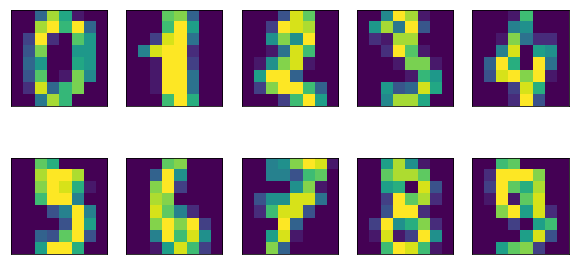

In [6]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks': (), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
      ax.imshow(img)

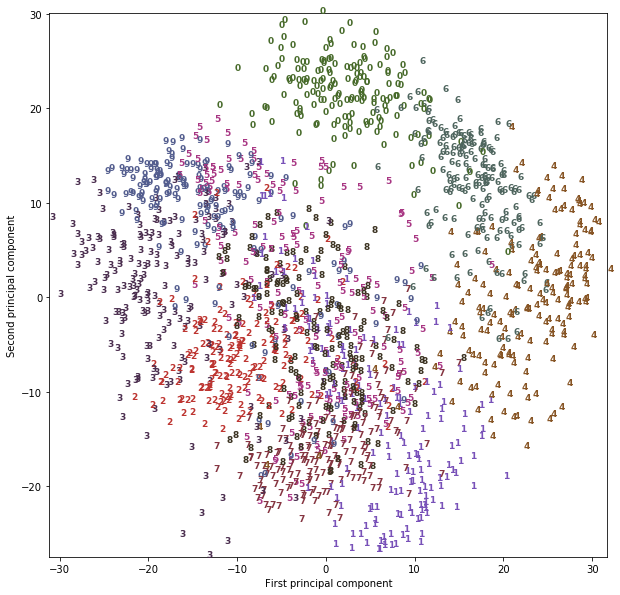

In [9]:
# PCAモデルを構築
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(digits.data)
# 数値データを最初の2主成分で変形
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
            "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # 散布図を数字でプロット
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), color = colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [10]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# fitではなくfit_transformを用いる ※ TSNEにはtransformがない
digits_tsne = tsne.fit_transform(digits.data)

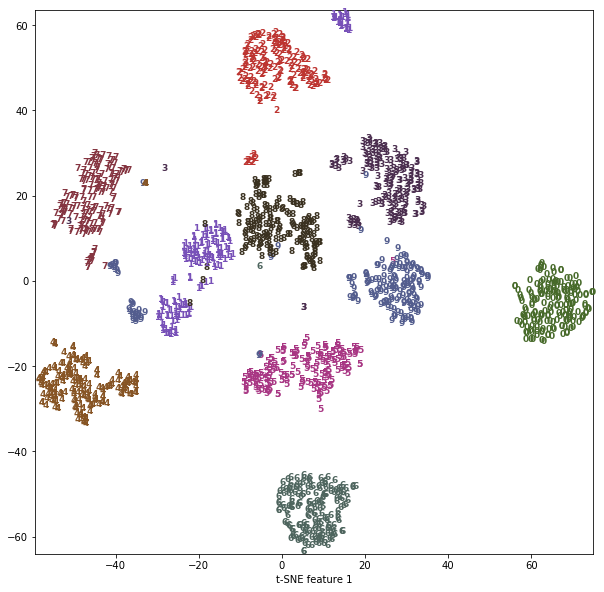

In [11]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # 点ではなく数字をテキストとしてプロットする
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
                   color = colors[digits.target[i]],
                   fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")

- t-SNEを用いると全てのクラスがかなり明確に分離されている
- この方法でクラスラベルは全くつかっていなく、完全に教師なし学習